# import 문

### 설치 필요


pip install python-dotenv

pip install sqlalchemy

pip install pymysql

pip install streamlit

In [5]:
import os
import sys

# intrusense 폴더를 sys.path에 추가
sys.path.append(os.path.abspath('../../'))

import re
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from scripts.save_data_to_db import select_files, create_db_engine, check_and_drop_table, save_label_mapping, process_and_save_csv_to_db

# .env 파일에서 환경변수 로드
load_dotenv()

# 모든 열이 출력되도록 설정
pd.set_option('display.max_columns', None)

# 칼럼/라벨

In [6]:
# 정의된 칼럼 리스트
columns = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label'
       ]

# 라벨 인코딩
label_mapping = {
    'BENIGN': 0, 'FTP-Patator': 1, 'SSH-Patator': 2, 'DoS slowloris': 3,
    'DoS Slowhttptest': 4, 'DoS Hulk': 5, 'DoS GoldenEye': 6, 'Heartbleed': 7,
    'Web Attack � Brute Force': 8, 'Web Attack � XSS': 9,
    'Web Attack � Sql Injection': 10, 'Infiltration': 11, 'Bot': 12,
    'PortScan': 13, 'DDoS': 14
}

# CSV를 DB에 저장하고 합쳐진 데이터 CSV로 저장

### DB 세팅

데이터베이스 연결을 위해, intrusense 데이터베이스 필요

intrusense 데이터베이스 생성 sql:

```CREATE DATABASE intrusense;```

### CSV파일들을 DB에 저장.

이미 intrusense db가 있는 경우 입력창으로 작업 확인.

In [7]:
# MySQL 연결 정보
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = int(os.getenv('DB_PORT'))
database = os.getenv('DB_DATABASE')

# 테이블 이름
table_name = 'network_data_table'
label_table_name = 'label_mapping_table'
source_table_name = 'source_file_table'

# 파일 선택
data_files = select_files()

# DB 엔진 생성
engine = create_db_engine(user, password, host, port, database)

# 테이블 처리 및 데이터 저장
check_and_drop_table(engine, table_name, columns)
save_label_mapping(engine, label_mapping, label_table_name)
process_and_save_csv_to_db(engine, data_files, columns, table_name, source_table_name, label_mapping) 
# 결측치 처리: Imputation
# 'Flow Duration'이 0인 경우 Flow Bytes/s, Flow Packets/s가 NaN 혹은 무한으로 0으로 대체하여 저장

'network_data_table' 테이블이 삭제되었습니다.
'network_data_table' 테이블이 생성되었습니다.
라벨 매핑 정보가 'label_mapping_table' 테이블에 저장되었습니다.
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/data/raw/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv 데이터베이스에 저장 완료
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/data/raw/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv 데이터베이스에 저장 완료
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/data/raw/Friday-WorkingHours-Morning.pcap_ISCX.csv 데이터베이스에 저장 완료
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/data/raw/Monday-WorkingHours.pcap_ISCX.csv 데이터베이스에 저장 완료
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/data/raw/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv 데이터베이스에 저장 완료
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/data/raw/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv 데이터베이스에 저장 완료
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/data/raw/Tuesday-WorkingHours.pcap_ISCX.csv 데이터베이스에 저장 완료
C:/Users/ASUS VivoBook X571LI/Desktop/Intrusense/dat

### DB에서 데이터 불러오기

In [2]:
# MySQL 연결 정보
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = int(os.getenv('DB_PORT'))
database = os.getenv('DB_DATABASE')

# DB 엔진 생성
engine = create_db_engine(user, password, host, port, database)

# 테이블 이름
table_name = 'network_data_table'

# SQL 쿼리 실행하여 DataFrame으로 데이터 가져오기
query = f"SELECT * FROM {table_name}"
# df = pd.read_sql(query, con=engine, index_col='id')
df = pd.read_sql(query, con=engine)

df.head(3)

NameError: name 'os' is not defined

### DB 데이터를 csv로 저장하기

In [9]:
df.to_csv("../../data/processed/merged_data.csv", index=True)

# CSV에서 파일 읽어오기

위에 cell이 실행되었다면 아래 코드셀은 스킵 가능. 

새로 열었다면 아래 셀 부터 실행.

In [10]:
df = pd.read_csv("../../data/processed/merged_data.csv")

# 데이터 분석

### 칼럼 확인

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'Destination Port', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',

### 데이터 확인

In [12]:
df.describe()

,Unnamed: 0,id,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,1.415371e+06,1.415372e+06,8.071483e+03,1.478567e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,1.490208e+06,7.078248e+04,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042938e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599738e+04,-2.273272e+03,6.386536e+04,6.995191e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599738e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741689e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038440e+05,8.695752e+06,7.920031e+06,1.828815e+00,5.164596e+00
std,8.171653e+05,8.171653e+05,1.828363e+04,3.365375e+07,7.496728e+02,9.973883e+02,9.993590e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811870e+02,1.946367e+03,6.886260e+01,6.052569e+02,8.396933e+02,2.592706e+07,2.542966e+05,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525723e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105284e+07,1.452207e+06,2.475372e+05,3.815169e+04,2.523772e+01,2.028229e+03,3.054916e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.57410

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 82 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   id                           int64  
 2   Destination Port             float64
 3   Flow Duration                float64
 4   Total Fwd Packets            float64
 5   Total Backward Packets       float64
 6   Total Length of Fwd Packets  float64
 7   Total Length of Bwd Packets  float64
 8   Fwd Packet Length Max        float64
 9   Fwd Packet Length Min        float64
 10  Fwd Packet Length Mean       float64
 11  Fwd Packet Length Std        float64
 12  Bwd Packet Length Max        float64
 13  Bwd Packet Length Min        float64
 14  Bwd Packet Length Mean       float64
 15  Bwd Packet Length Std        float64
 16  Flow Bytes/s                 float64
 17  Flow Packets/s               float64
 18  Flow IAT Mean                float64
 19  

### 칼럼 시각화 및 저장

In [ ]:
# 파일 저장 경로 설정
output_folder = '../../results/figures/column_visualizations/'

# 폴더가 없으면 생성
os.makedirs(output_folder, exist_ok=True)

# 수치형 칼럼에서 'id', 'Destination Port', 'Label', 'source'를 제외한 칼럼 선택
columns_to_plot = df.columns.difference(['id', 'Destination Port', 'Label', 'source'])

# 수치형 칼럼에 대해 박스플롯 생성 및 저장
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # 박스플롯 생성
    sns.boxplot(x=df[column])
    
    plt.title(f'{column} Boxplot')
    plt.tight_layout()
    
    # 파일 이름에 안전한 문자로 대체
    safe_column_name = re.sub(r'[\\/:"*?<>|]', '_', column)
    
    # 시각화 저장
    plt.savefig(os.path.join(output_folder, f'{safe_column_name}_boxplot.png'))
    plt.close()

# 범주형 칼럼인 'Destination Port', 'Label', 'source'에 대해 파이 차트 생성 및 저장
categorical_columns = ['Destination Port', 'Label', 'source']

for column in categorical_columns:
    plt.figure(figsize=(8, 8))
    
    # 파이 차트
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'{column} Pie Chart')
    plt.ylabel('')  # 라벨 제거
    
    # 시각화 저장
    plt.savefig(os.path.join(output_folder, f'{column}_pie_chart.png'))
    plt.close()


KeyboardInterrupt: 

### streamlit 실행해서 시각화 결과 확인

In [ ]:
import subprocess

# Streamlit 애플리케이션 경로
script_path = "../../scripts/streamlit_app.py"

# Streamlit 실행 명령어
command = f"streamlit run {script_path}"

# Streamlit 서버 실행
process = subprocess.Popen(command, shell=True)

http://localhost:8501

접속 주소

### streamlit 종료

In [ ]:
process.terminate()

### X와 y

In [ ]:
# 'source' 칼럼을 제외하고 'Label' 칼럼을 y로 설정
X = df.drop(columns=['source', 'Label'])  # 'source'와 'Label' 칼럼을 제외한 나머지 칼럼들. id 포함
y = df['Label']  # 'Label' 칼럼을 y로 설정

## 드랍할 칼럼 선정

In [ ]:
columns_to_drop = {}

### 유니크 값이 1개인 칼럼과 유니크 값이 20개 미만인 칼럼 중에서 값이 극단적으로 치우쳐지고, Label이 0인 칼럼 확인

In [ ]:
columns_to_drop['unique_n1'] = set()

# 유니크한 값이 1개인 칼럼명 찾기
unique_value_n1_columns = [col for col in X.columns if X[col].nunique() == 1]
# 유니크한 값이 1개 초과 20개 미만인 칼럼명 찾기
unique_value_under_n20_columns = [(col, X[col].nunique()) for col in X.columns if 1 < X[col].nunique() < 20]

print("유니크 값이 1개인 칼럼:")
for i in range(len(unique_value_n1_columns)):
    print(f"{unique_value_n1_columns[i]}", end='\t')
    columns_to_drop['unique_n1'].add(unique_value_n1_columns[i])
    if (i+1) % 5 == 0:
        print()
        
print()
print()

print("유니크 값이 1개 초과 20개 미만인 칼럼: (칼럼명, 유니크 값 수)")
for i in range(len(unique_value_under_n20_columns)):
    print(f"{unique_value_under_n20_columns[i]}", end='\t')
    if (i+1) % 5 == 0:
        print()

유니크 값이 1개인 칼럼:
Bwd PSH Flags	Bwd URG Flags	Fwd Avg Bytes/Bulk	Fwd Avg Packets/Bulk	Fwd Avg Bulk Rate	
Bwd Avg Bytes/Bulk	Bwd Avg Packets/Bulk	Bwd Avg Bulk Rate	

유니크 값이 1개 초과 20개 미만인 칼럼: (칼럼명, 유니크 값 수)
('Fwd PSH Flags', 2)	('Fwd URG Flags', 2)	('FIN Flag Count', 2)	('SYN Flag Count', 2)	('RST Flag Count', 2)	
('PSH Flag Count', 2)	('ACK Flag Count', 2)	('URG Flag Count', 2)	('CWE Flag Count', 2)	('ECE Flag Count', 2)	


In [ ]:
columns_to_drop['unique_n20'] = set()

for col in unique_value_under_n20_columns:
    # 열 이름 출력
    print(f"[{col[0]}]")
    
    # 유니크 값과 그 유니크 값의 개수 출력
    value_counts = X[col[0]].value_counts()
    for value, count in value_counts.items():
        # 'Label' 값의 유니크 값들 출력
        unique_labels = pd.unique(df[df[col[0]] == value]['Label'])
        
        # 각 unique label의 갯수를 세서 출력
        label_counts = df[df[col[0]] == value]['Label'].value_counts()
        formatted_label_counts = [f"{label}: {cnt}" for label, cnt in label_counts.items()]
        
        # 유니크 값, 개수, 라벨 분포 출력
        print(f"  [{value}] {count}   Unique Labels: {', '.join(formatted_label_counts)}")

        # 'Unique Labels'의 길이가 1인 경우 해당 칼럼을 드롭 리스트에 추가
        if len(unique_labels) == 1:
            columns_to_drop['unique_n20'].add(col[0])
    
    print("====")

[Fwd PSH Flags]
  [0] 2699265   Unique Labels: 0: 2148335, 5: 231073, 13: 158930, 14: 128027, 6: 10293, 2: 5883, 4: 4601, 1: 3991, 3: 3959, 12: 1966, 8: 1507, 9: 652, 10: 21, 11: 16, 7: 11
  [1] 131478   Unique Labels: 0: 124762, 1: 3947, 3: 1837, 4: 898, 11: 20, 2: 14
====
[Fwd URG Flags]
  [0] 2830428   Unique Labels: 0: 2272782, 5: 231073, 13: 158930, 14: 128027, 6: 10293, 1: 7938, 2: 5897, 3: 5796, 4: 5499, 12: 1966, 8: 1507, 9: 652, 11: 36, 10: 21, 7: 11
  [1] 315   Unique Labels: 0: 315
====
[FIN Flag Count]
  [0] 2730592   Unique Labels: 0: 2231909, 5: 172137, 13: 158930, 14: 128000, 6: 10293, 1: 7938, 2: 5897, 3: 5796, 4: 5499, 12: 1966, 8: 1507, 9: 652, 11: 36, 10: 21, 7: 11
  [1] 100151   Unique Labels: 5: 58936, 0: 41188, 14: 27
====
[SYN Flag Count]
  [0] 2699265   Unique Labels: 0: 2148335, 5: 231073, 13: 158930, 14: 128027, 6: 10293, 2: 5883, 4: 4601, 1: 3991, 3: 3959, 12: 1966, 8: 1507, 9: 652, 10: 21, 11: 16, 7: 11
  [1] 131478   Unique Labels: 0: 124762, 1: 3947, 3: 18

### 상관관계 계산

In [ ]:
columns_to_drop['high_corr'] = set()

# 'id', 'source', 'Label' 칼럼을 제외하고 상관 행렬을 계산
# df_no_meta = df.drop(columns=['id', 'source', 'Label'])
df_no_meta = df.drop(columns=['source', 'Label'])

# 데이터프레임에서 상관 행렬(correlation matrix)을 계산
corr_matrix = df_no_meta.corr()

# 상관계수 기준 설정
threshold = 0.90

# 각 칼럼에 대해 반복문을 실행
for col in corr_matrix.columns:
    # 현재 칼럼과 상관계수가 threshold보다 큰 다른 칼럼들 찾기
    correlated_cols = corr_matrix.index[corr_matrix[col].abs() > threshold].tolist()
    
    # 상관계수가 threshold 이상인 칼럼이 1개 초과인 경우
    if len(correlated_cols) > 1:
        # 그 칼럼들을 columns_to_drop3 집합에 추가
        columns_to_drop['high_corr'].update(correlated_cols)

### 정상 / 공격 상관관계 계산

In [ ]:
columns_to_drop['high_corr_normal'] = set()
columns_to_drop['high_corr_attack'] = set()
columns_to_drop['high_corr_common'] = set()

# 데이터프레임에서 'Label' 값을 기준으로 각 클래스에 대한 데이터 필터링
normal_df = df[df['Label'] == 0]  # 정상 트래픽
attack_df = df[df['Label'] != 0]  # 공격 트래픽

# 각 클래스별 상관 행렬 계산
# normal_corr = normal_df.drop(columns=['id', 'source', 'Label']).corr()
# attack_corr = attack_df.drop(columns=['id', 'source', 'Label']).corr()
normal_corr = normal_df.drop(columns=['source', 'Label']).corr()
attack_corr = attack_df.drop(columns=['source', 'Label']).corr()

# 상관계수 기준 설정
threshold = 0.90

# 정상 트래픽에서 상관관계 높은 칼럼 추출
for col in normal_corr.columns:
    correlated_cols = normal_corr.index[normal_corr[col].abs() > threshold].tolist()
    if len(correlated_cols) > 1:
        columns_to_drop['high_corr_normal'].update(correlated_cols)

# 공격 트래픽에서 상관관계 높은 칼럼 추출
for col in attack_corr.columns:
    correlated_cols = attack_corr.index[attack_corr[col].abs() > threshold].tolist()
    if len(correlated_cols) > 1:
        columns_to_drop['high_corr_attack'].update(correlated_cols)

# 두 클래스에 대해 공통으로 드롭할 칼럼
columns_to_drop['high_corr_common'] = columns_to_drop['high_corr_normal'].intersection(columns_to_drop['high_corr_attack'])

In [ ]:
# 선정된 드랍 할 칼럼 확인
print(columns_to_drop)

{'unique_n1': {'Bwd PSH Flags', 'Bwd URG Flags', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Fwd Avg Bulk Rate'}, 'unique_n20': {'ECE Flag Count', 'CWE Flag Count', 'Fwd URG Flags', 'RST Flag Count'}, 'high_corr': {'Subflow Fwd Bytes', 'Avg Bwd Segment Size', 'Flow Packets/s', 'Active Mean', 'Fwd Header Length.1', 'Fwd IAT Mean', 'ECE Flag Count', 'Packet Length Mean', 'Average Packet Size', 'Flow Duration', 'Fwd URG Flags', 'Flow IAT Std', 'Fwd Packet Length Mean', 'Flow IAT Max', 'Bwd IAT Min', 'Subflow Fwd Packets', 'Fwd IAT Max', 'Avg Fwd Segment Size', 'Bwd Packet Length Mean', 'Bwd IAT Mean', 'Packet Length Std', 'Total Backward Packets', 'Fwd Packet Length Std', 'Fwd IAT Std', 'Total Length of Bwd Packets', 'Bwd Packet Length Max', 'SYN Flag Count', 'Active Min', 'Bwd Packet Length Std', 'Subflow Bwd Packets', 'Fwd Packets/s', 'Max Packet Length', 'Idle Max', 'Fwd PSH Flags', 'Packet Length Variance', 'Fwd IAT

=== 요까지

Flow Duration이 음수인 데이터의 개수: 115
Flow Duration이 음수인 데이터의 타겟 값: [0]


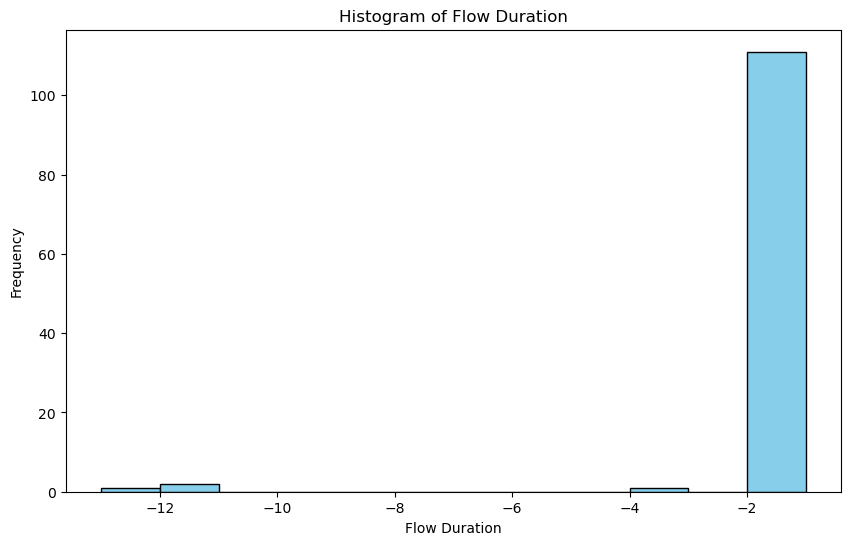

In [ ]:
# Flow Duration이 음수인 데이터 필터링
negative_flow_duration = df[df['Flow Duration'] < 0]

# 음수인 'Flow Duration'에 해당하는 'Label'의 고유 값 확인
unique_labels = negative_flow_duration['Label'].unique()

print(f'Flow Duration이 음수인 데이터의 개수: {len(negative_flow_duration)}')
print(f'Flow Duration이 음수인 데이터의 타겟 값: {unique_labels}')

# Flow Duration의 최소값과 최대값 계산
min_value = negative_flow_duration['Flow Duration'].min()
max_value = negative_flow_duration['Flow Duration'].max()

# bins의 개수를 최소값과 최대값 차이로 설정
num_bins = max_value - min_value

# 음수인 'Flow Duration'의 값 분포를 히스토그램으로 표시
plt.figure(figsize=(10, 6))
plt.hist(negative_flow_duration['Flow Duration'], bins=num_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df[df['Flow Bytes/s'] == np.inf]

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source


In [ ]:
flow_bytes_inf = df[df['Flow Bytes/s'].apply(lambda x: x==np.inf or pd.isna(x))]
flow_bytes_inf

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source


In [ ]:
flow_packets_inf = df[df['Flow Packets/s'].apply(lambda x: x==np.inf or pd.isna(x))]
flow_packets_inf

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source


In [ ]:
flow_duration_zero = df[df['Flow Duration']== 0]
flow_duration_zero

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source
65,65,55043,0,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4737,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,1
1767,1767,60018,0,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,5114,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,1
1890,1890,80,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,258,335,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0,1
3375,3375,443,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,252,114,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0,1
6796,6796,36812,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,7633,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823284,2823284,61647,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,946,16425,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0,8
2824709,2824709,49234,0,2,0,124,0,62,62,62.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,62,62,62.0,0.0,0.0,0,0,0,0,0,0,0,0,0,93.0,62.0,0.0,40,0,0,0,0,0,0,2,124,0,0,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,8
2824846,2824846,33238,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,7635,40764,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0,8
2824854,2824854,59112,0,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,2760,16560,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0,8


In [ ]:
flow_duration_zero.equals(flow_packets_inf) and flow_duration_zero.equals(flow_bytes_inf)

False

In [ ]:
# Flow Bytes/s 계산 (예시)
calculated_flow_bytes_s = (df['Total Length of Fwd Packets'] + df['Total Length of Bwd Packets']) / (df['Flow Duration'])

# Flow Packets/s 계산 (예시)
calculated_flow_packets_s = (df['Total Fwd Packets'] + df['Total Backward Packets']) / (df['Flow Duration']/1_000_000)

# 실제 값과 계산된 값을 비교
bytes_s_match = np.isclose(df['Flow Bytes/s'], calculated_flow_bytes_s)
packets_s_match = np.isclose(df['Flow Packets/s'], calculated_flow_packets_s)

# 일치하지 않는 데이터에서 필요한 칼럼만 출력
bytes_s_mismatch_data = df[~bytes_s_match][['Flow Bytes/s', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Flow Duration']]

# 일치하지 않는 데이터 출력
print("Flow Bytes/s 계산 값과 실제 값이 일치하지 않는 데이터:")
print(bytes_s_mismatch_data)

# 일치하지 않는 Flow Packets/s 데이터도 동일하게 출력
packets_s_mismatch_data = df[~packets_s_match][['Flow Packets/s', 'Total Fwd Packets', 'Total Backward Packets', 'Flow Duration']]

print("Flow Packets/s 계산 값과 실제 값이 일치하지 않는 데이터:")
print(packets_s_mismatch_data)


Flow Bytes/s 계산 값과 실제 값이 일치하지 않는 데이터:
         Flow Bytes/s  Total Length of Fwd Packets  \
0        4.000000e+06                           12   
1        1.100917e+05                            6   
2        2.307692e+05                            6   
3        3.529412e+05                            6   
4        4.000000e+06                           12   
...               ...                          ...   
2830738  8.194940e+03                          112   
2830739  1.376543e+06                           84   
2830740  4.512195e+05                           31   
2830741  4.272221e+02                          192   
2830742  4.360695e+03                          188   

         Total Length of Bwd Packets  Flow Duration  
0                                  0              3  
1                                  6            109  
2                                  6             52  
3                                  6             34  
4                                  0       

In [ ]:
df['Flow Bytes'] = df['Flow Bytes/s'] * df['Flow Duration'] / 1_000_000
df[['Total Length of Fwd Packets','Total Length of Bwd Packets', 'Fwd Packet Length Max', 
               'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Avg Fwd Segment Size', 
               'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Flow Bytes']]

,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Subflow Bwd Bytes,Flow Bytes
0,12,0,6,6.0,0,0.0,6.0,0.0,12,0,12.0
1,6,6,6,6.0,6,6.0,6.0,6.0,6,6,12.0
2,6,6,6,6.0,6,6.0,6.0,6.0,6,6,12.0
3,6,6,6,6.0,6,6.0,6.0,6.0,6,6,12.0
4,12,0,6,6.0,0,0.0,6.0,0.0,12,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
2830738,112,152,28,28.0,76,76.0,28.0,76.0,112,152,264.0
2830739,84,362,42,42.0,181,181.0,42.0,181.0,84,362,446.0
2830740,31,6,31,15.5,6,6.0,15.5,6.0,31,6,37.0
2830741,192,256,32,32.0,128,128.0,32.0,128.0,192,256,448.0


In [ ]:
from decimal import Decimal, getcontext

# Decimal의 정밀도 설정 (소수점 이하 50자리까지 계산)
getcontext().prec = 50

df['Flow Bytes'] = df['Flow Bytes/s'] * df['Flow Duration'] / 1_000_000
df['Flow Bytes2'] = df['Total Length of Fwd Packets'] + df['Total Length of Bwd Packets']
# Flow Bytes와 Flow Bytes2의 차이를 계산하여 비교
df['Difference'] = df['Flow Bytes'] - df['Flow Bytes2']

# 차이가 거의 0인지를 확인 (소수점 오차를 고려)
df['Are Equal'] = np.isclose(df['Flow Bytes'], df['Flow Bytes2'], atol=1e-6)

# Flow Bytes와 Flow Bytes2가 동일한지 확인
are_all_equal = df['Are Equal'].all()

if are_all_equal:
    print("모든 값이 동일합니다.")
else:
    print("일부 값이 다릅니다.")

# 'Are Equal'이 False인 행들만 필터링
mismatch_data = df[df['Are Equal'] == False]

# 불일치하는 데이터 출력
mismatch_data[['Total Length of Fwd Packets','Total Length of Bwd Packets', 'Fwd Packet Length Max', 
               'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Avg Fwd Segment Size', 
               'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'Flow Bytes', 'Flow Bytes2']]


일부 값이 다릅니다.


,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Subflow Bwd Bytes,Flow Bytes,Flow Bytes2
10,37,0,31,18.500000,0,0.0,18.500000,0.0,37,0,36.9,37
13,43,0,31,14.333333,0,0.0,14.333333,0.0,43,0,42.9,43
25,43,0,31,14.333333,0,0.0,14.333333,0.0,43,0,43.2,43
29,37,0,31,18.500000,0,0.0,18.500000,0.0,37,0,36.9,37
30,37,0,31,18.500000,0,0.0,18.500000,0.0,37,0,36.9,37
...,...,...,...,...,...,...,...,...,...,...,...,...
2828325,124,0,62,62.000000,0,0.0,62.000000,0.0,124,0,123.9,124
2829226,37,6,31,18.500000,6,6.0,18.500000,6.0,37,6,43.2,43
2829343,650,0,50,50.000000,0,0.0,50.000000,0.0,650,0,649.0,650
2829889,124,0,62,62.000000,0,0.0,62.000000,0.0,124,0,123.9,124


In [ ]:
from sklearn.linear_model import LinearRegression

# 'Flow Bytes/s'에서 NaN 및 inf 값을 처리
df['Flow Bytes/s'] = df['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)

# NaN을 제외한 데이터 선택
df_no_nan = df[df['Flow Bytes/s'].notna()]

# Flow Bytes를 예측하기 위한 입력 칼럼들
X = df_no_nan[['Total Fwd Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 
               'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Avg Fwd Segment Size', 
               'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes']]

# 목표 변수는 Flow Bytes/s
y = df_no_nan['Flow Bytes/s']

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 계수 출력
coefficients = model.coef_
print(f"회귀 계수: {coefficients}")


회귀 계수: [ 2.00755732e+03  3.63394744e+04 -2.68402366e+01 -8.43146145e+03
  1.39645877e+05  5.66811926e+02 -6.18895664e+12 -9.59642366e+04
  6.18895664e+12 -3.64284370e+04  2.63458546e+01]


In [ ]:
bytes_s_mismatch_data.iloc[1:5]

,Flow Bytes/s,Total Length of Fwd Packets,Total Length of Bwd Packets,Flow Duration
1,1.100917e+05,6,6,109
2,2.307692e+05,6,6,52
3,3.529412e+05,6,6,34
4,4.000000e+06,12,0,3


In [ ]:
# 칼럼들의 상관 관계 계산
correlation_matrix = df.corr(numeric_only=True)

# Flow Bytes/s와 관련된 칼럼들 출력 (상관 계수가 높은 순서대로)
flow_bytes_corr = correlation_matrix['Flow Bytes/s'].sort_values(ascending=False)
print("Flow Bytes/s와 상관 관계가 높은 칼럼들:")
print(flow_bytes_corr)

# Flow Packets/s와 관련된 칼럼들 출력 (상관 계수가 높은 순서대로)
flow_packets_corr = correlation_matrix['Flow Packets/s'].sort_values(ascending=False)
print("\nFlow Packets/s와 상관 관계가 높은 칼럼들:")
print(flow_packets_corr)


Flow Bytes/s와 상관 관계가 높은 칼럼들:
Flow Bytes/s            1.000000
Fwd Packets/s           0.228412
Flow Packets/s          0.226108
SYN Flag Count          0.169552
Fwd PSH Flags           0.169552
                          ...   
Fwd Avg Packets/Bulk         NaN
Fwd Avg Bulk Rate            NaN
Bwd Avg Bytes/Bulk           NaN
Bwd Avg Packets/Bulk         NaN
Bwd Avg Bulk Rate            NaN
Name: Flow Bytes/s, Length: 85, dtype: float64

Flow Packets/s와 상관 관계가 높은 칼럼들:
Flow Packets/s          1.000000
Fwd Packets/s           0.987563
ACK Flag Count          0.247802
Bwd Packets/s           0.241338
Destination Port        0.232482
                          ...   
Fwd Avg Packets/Bulk         NaN
Fwd Avg Bulk Rate            NaN
Bwd Avg Bytes/Bulk           NaN
Bwd Avg Packets/Bulk         NaN
Bwd Avg Bulk Rate            NaN
Name: Flow Packets/s, Length: 85, dtype: float64


In [ ]:
# Flow Bytes/s가 np.inf인 데이터에서 Flow Duration이 0인지 확인
flow_bytes_inf = df[df['Flow Bytes/s'] == np.inf]

# Flow Duration이 0인 데이터를 필터링
flow_bytes_duration_zero = flow_bytes_inf['Flow Duration'] == 0

# 결과 출력
if flow_bytes_duration_zero.all():
    print("Flow Bytes/s가 np.inf인 모든 데이터에서 Flow Duration이 0입니다.")
else:
    print("Flow Bytes/s가 np.inf인 데이터 중에서 Flow Duration이 0이 아닌 데이터가 존재합니다.")
    # Flow Duration이 0이 아닌 데이터 출력
    print(flow_bytes_inf[~flow_bytes_duration_zero])


flow_packets_inf = df[df['Flow Packets/s'] == np.inf]

flow_packets_duration_zero = flow_packets_inf['Flow Duration'] == 0

if flow_packets_duration_zero.all():
    print("Flow Packets/s가 np.inf인 모든 데이터에서 Flow Duration이 0입니다.")
else:
    print("Flow Packets/s가 np.inf인 데이터 중에서 Flow Duration이 0이 아닌 데이터가 존재합니다.")
    # Flow Duration이 0이 아닌 데이터 출력
    print(flow_packets_inf[~flow_packets_duration_zero])


# Flow Duration이 0인 데이터에서 Flow Bytes/s가 np.inf인지 확인
flow_duration_zero = df[df['Flow Duration'] == 0]

# Flow Bytes/s가 np.inf인지를 확인
flow_duration_zero_bytes_inf = flow_duration_zero['Flow Bytes/s'] == np.inf

# 결과 출력
if flow_duration_zero_bytes_inf.all():
    print("Flow Duration이 0인 모든 데이터에서 Flow Bytes/s가 np.inf입니다.")
else:
    print("Flow Duration이 0인 데이터 중에서 Flow Bytes/s가 np.inf가 아닌 데이터가 존재합니다.")
    # Flow Bytes/s가 np.inf가 아닌 데이터 출력
    print(flow_duration_zero[~flow_duration_zero_bytes_inf])


# flow_bytes_duration_zero와 flow_packets_duration_zero가 같은지 확인
are_equal_flow_duration = flow_bytes_duration_zero.equals(flow_packets_duration_zero)

# 결과 출력
if are_equal_flow_duration:
    print("flow_bytes_duration_zero와 flow_packets_duration_zero는 같습니다.")
else:
    print("flow_bytes_duration_zero와 flow_packets_duration_zero는 다릅니다.")


Flow Bytes/s가 np.inf인 모든 데이터에서 Flow Duration이 0입니다.
Flow Packets/s가 np.inf인 모든 데이터에서 Flow Duration이 0입니다.
Flow Duration이 0인 데이터 중에서 Flow Bytes/s가 np.inf가 아닌 데이터가 존재합니다.
         Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
65               65             55043              0                  2   
1767           1767             60018              0                  2   
1890           1890                80              0                  1   
3375           3375               443              0                  1   
6796           6796             36812              0                  2   
...             ...               ...            ...                ...   
2823284     2823284             61647              0                  1   
2824709     2824709             49234              0                  2   
2824846     2824846             33238              0                  1   
2824854     2824854             59112              0                  1   
282603

In [ ]:
import joblib

# 저장된 PCA 모델 불러오기
pca_model = joblib.load('pca_model.pkl')
pca_model

PCA(n_components=49)

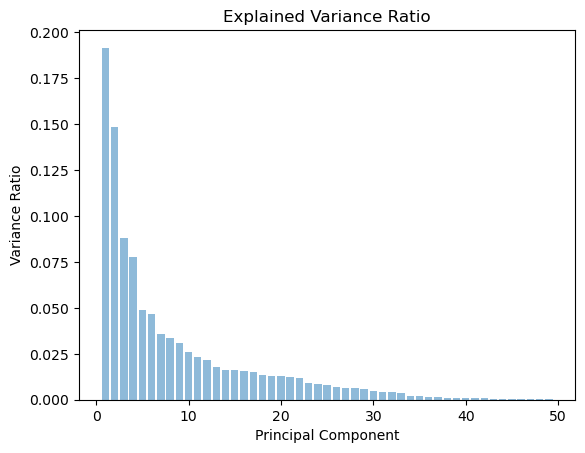

In [ ]:
import matplotlib.pyplot as plt

# 설명된 분산 비율 시각화
plt.bar(range(1, len(pca_model.explained_variance_ratio_) + 1), 
        pca_model.explained_variance_ratio_, alpha=0.5, align='center')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("../../data/processed/merged_data.csv")

# 2. 데이터 전처리
X = df.drop(columns=['source', 'Label']) 
y = df['Label']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. PCA로 차원 축소
n_components = 10  # 축소할 차원 수
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# 5. 예측 및 평가
y_pred = rf_model.predict(X_test_pca)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 상세 평가 리포트
print(classification_report(y_test, y_pred))

# 6. PCA 성분 중요도 확인
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454434
           1       1.00      0.99      0.99      1612
           2       0.93      0.73      0.81      1173
           3       1.00      0.98      0.99      1173
           4       0.99      0.99      0.99      1072
           5       1.00      1.00      1.00     46486
           6       0.99      0.98      0.98      2074
           7       1.00      0.50      0.67         2
           8       0.82      0.75      0.78       308
           9       0.61      0.55      0.58       119
          10       1.00      0.14      0.25         7
          11       0.50      0.20      0.29         5
          12       0.86      0.78      0.82       390
          13       1.00      1.00      1.00     31711
          14       1.00      1.00      1.00     25583

    accuracy                           1.00    566149
   macro avg       0.91      0.77      0.81    566149
weighted av